## Analiza najpomembnejših tritedenskih dirk v kolesarstvu ##

V tej datoteki se lotimo analize treh najpomembnejših dirk v kolesarstvu. To so Giro d'Italia (dirka po Italiji), Tour de France (dirka po Franciji) in Vuelta a España (dirka po Španiji). Analizo bomo začeli s klasičnimi metrika, recimo pretekli zmagovalci, dolžine etap... V drugem delu analize pa se posvetimo analizi karakteristik posameznih dirk. Poudarek tukaj je predvsem na vzponih, saj so si ravninske etap med seboj zelo podobne.

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("style.mplstyle")

### Analiza vzponov ###
Da analizo dirk malo poglobimo in popestrimo, bomo analizirali vzpone, ki se pojavljajo na dirkah. Žal podatki o vzponih niso konsistentni do leta 2015, ko so na spletno stran PCS začeli objavljati podatke. Kljub temu pa je podatkov dovolj, da naredimo neke smiselne zaključke.

Začnimo s pregledom vzponov, ki se na dirkah najpogosteje pojavljajo. Tukaj je morda smiselno omeniti, da ni nujno, da se dirke pričnejo v državi, ki dirko organizira. Posledica tega je recimo, da se nekateri vzponi lahko pojavijo tako na dirki po Španiji kot na dirki po Franciji.

In [61]:
data_frame = pd.read_csv("../data/csv/climbs.csv")
data_frame

,Name,Length,Steepness,Vertical,Year
0,Le Mourtis,0.00,0.0,1409,1979
1,Col du Portillon,0.00,0.0,1569,1979
2,Col du Lautaret,0.00,0.0,0,2003
3,Col d'Izoard,0.00,0.0,0,2003
4,Côte de Saint-Apollinaire,0.00,0.0,0,2003
...,...,...,...,...,...
462,Côte d'Outreau,0.80,8.0,80,2025
463,Rampe Saint-Hilaire,0.80,9.4,134,2025
464,Côte de Pech David,0.80,9.8,240,2025
465,Vire,0.75,8.9,166,2025


Sprva si poglejmo porazdelitev števila vzponov glede na leto

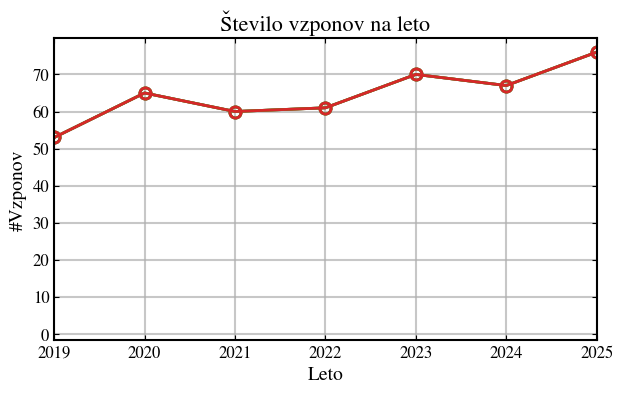

In [41]:
graph_climbs_by_year = data_frame.groupby("Year").count()

plt.plot(graph_climbs_by_year.index, graph_climbs_by_year.values)
plt.xlim([2019, 2025])
plt.title("Število vzponov na leto")
plt.xlabel("Leto")
plt.ylabel("#Vzponov")
plt.show()

Opazimo, da imajo direke podobno število vzponov, vseeno pa izstopa dirka po Franciji. Število vzponov pa zagotovo ni edino merilo o zahtevnosti etap. Zato si je smiselno pogeldati tudi povprečno višino in dolžino vzponov.

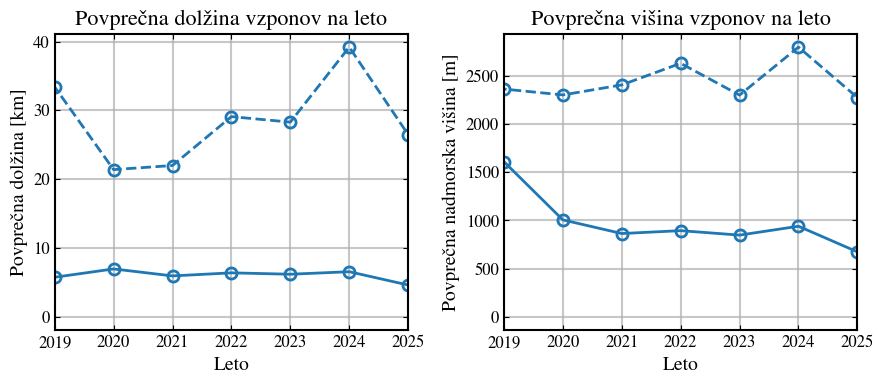

In [54]:
graph_climb_length_by_year = data_frame.groupby("Year")["Length"].mean()
graph_climb_max_length_by_year = data_frame.groupby("Year")["Length"].max()

graph_climb_height_by_year = data_frame[data_frame["Vertical"] != 0].groupby("Year")["Vertical"].mean()
graph_climb_max_height_by_year = data_frame.groupby("Year")["Vertical"].max()

fig, ax = plt.subplots(1, 2, figsize=(9, 4))

p1 = ax[0].plot(graph_climb_length_by_year.index, graph_climb_length_by_year.values)

colour =  p1[0].get_color()

ax[0].plot(graph_climb_max_length_by_year.index, graph_climb_max_length_by_year.values, linestyle="--", color = colour)
ax[0].set_xlim([2019, 2025])
ax[0].set_title("Povprečna dolžina vzponov na leto")
ax[0].set_xlabel("Leto")
ax[0].set_ylabel("Povprečna dolžina [km]")


ax[1].plot(graph_climb_height_by_year.index, graph_climb_height_by_year.values, color = colour)
ax[1].plot(graph_climb_max_height_by_year.index, graph_climb_max_height_by_year.values, linestyle="--", color = colour)
ax[1].set_xlim([2019, 2025])
ax[1].set_title("Povprečna višina vzponov na leto")
ax[1].set_xlabel("Leto")
ax[1].set_ylabel("Povprečna nadmorska višina [m]")

fig.set_tight_layout(True)
plt.show()

Izbira vzponov je med leti ne glede na dirko zelo usklajena. Med dirkami pa prihaja do različnih odstopanj, recimo opazimo lahko...

Kot zadnje merilo pa si poglejmo še naklon vzponov. Dirka po Španiji je recimo znana kot dirka, ki ima kratke a izjemno strme vzpone. To se odraža predvsem v naklon, kjer lahko kolesarji pogosto pričakujejo tudi nad 20% naklon na delih vzponov. Sprva si poglejmo tabelo naklonov soritrano po najvišjem povprečnem naklonu

In [62]:
data_frame.sort_values("Steepness", ascending=False)

,Name,Length,Steepness,Vertical,Year
65,Côte de Mutigny,0.9,12.2,0,2019
98,Montée du plateau des Glières,6.0,11.2,1392,2020
252,Côte de Pulventeux,0.8,10.9,341,2022
48,Mur d'Aurec-sur-Loire,3.2,10.8,0,2019
386,Côte de Gallisterna,1.4,10.5,256,2024
...,...,...,...,...,...
1,Col du Portillon,0.0,0.0,1569,1979
9,Chalet Reynard,0.0,0.0,0,2016
10,Col du Galibier,0.0,0.0,2623,2017
11,Col de Vars,0.0,0.0,2098,2017


Tukaj, kot že omenjeno, ni nobenega presenečenja. Dirka po Španiji ima daleč najstrmejše vzpone.

#### Težavnost vzponov ####
Vzpone lahko karakteriziramo tudi po težavnosti. Za metriko lahko vzamemo recimo **ASO** formulo $$S = L G^2, $$ kjer je $L$ dolžina vzpona in $G$ povprečni naklon. Ta formula se uporablja za določitev težavnostnih točk na dirki po Franciji. Za primerjavo pa vzamimo formulo, ki je bila določena z regresijskim modelom na sledečem [linku](https://www.scienceofpeloton.com/p/judging-climbing-stage-difficulty) 
$$ S = G + L + S + G L, $$
kjer je $S$ nadomorska višina najvišje točke vzpona.